<a href="https://colab.research.google.com/github/AnikMitra/Major-Project/blob/main/Explanatory%20Data%20Analysis/Explanatory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# **Classroom ID : DS-05-BS1**

# Importing Dataset

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
import numpy as np
import pandas as pd

In [144]:
# Now, we can use pandas read_excel after installing the excel importer.
!pip install -q xlrd

In [145]:
df = pd.read_excel('/content/drive/MyDrive/smartknower data science course/Major Project/Explanatory Analysis/covid-data.xlsx')
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_tests_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101129,ZWE,Africa,Zimbabwe,2021-07-04,54474.0,809.0,1878.0,19.0,3361.0,683467.0,45.985,0.153,1361210.0,793077.0,568133.0,1623.0,9.16,5.34,3.82
101130,ZWE,Africa,Zimbabwe,2021-07-05,56014.0,1540.0,1911.0,33.0,3635.0,687102.0,46.229,0.165,1369436.0,797715.0,571721.0,8226.0,9.21,5.37,3.85
101131,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1939.0,28.0,10598.0,697700.0,46.942,0.172,1382567.0,807633.0,574934.0,13131.0,9.30,5.43,3.87
101132,ZWE,Africa,Zimbabwe,2021-07-07,60227.0,2264.0,1973.0,34.0,10362.0,708062.0,47.639,0.190,1398757.0,819058.0,579699.0,16190.0,9.41,5.51,3.90


# Checking and Cleaning the Dataset

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101134 entries, 0 to 101133
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   iso_code                             101134 non-null  object 
 1   continent                            96402 non-null   object 
 2   location                             101134 non-null  object 
 3   date                                 101134 non-null  object 
 4   total_cases                          97388 non-null   float64
 5   new_cases                            97385 non-null   float64
 6   total_deaths                         87207 non-null   float64
 7   new_deaths                           87363 non-null   float64
 8   new_tests                            45511 non-null   float64
 9   total_tests                          45178 non-null   float64
 10  total_tests_per_thousand             45174 non-null   float64
 11  positive_rate

In [147]:
df1= df.loc[df["location"] != "Asia"]
df1= df1.loc[df1["location"] != "Africa"]
df1= df1.loc[df1["location"] != "World"]
df1= df1.loc[df1["location"] != "Europe"]
df1= df1.loc[df1["location"] != "North America"]
df1= df1.loc[df1["location"] != "South America"]
df1= df1.loc[df1["location"] != "Oceania"]
df1 = df1.loc[df1["date"] == "2021-07-08"]
df1

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_tests_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
500,AFG,Asia,Afghanistan,2021-07-08,130113.0,1092.0,5477.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1512,ALB,Europe,Albania,2021-07-08,132565.0,8.0,2456.0,0.0,NaN,NaN,NaN,NaN,1011297.0,582106.0,429191.0,5634.0,35.14,20.23,14.91
2012,DZA,Africa,Algeria,2021-07-08,143652.0,620.0,3798.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,AND,Europe,Andorra,2021-07-08,14050.0,29.0,127.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2982,AGO,Africa,Angola,2021-07-08,39593.0,102.0,925.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98551,VEN,South America,Venezuela,2021-07-08,281907.0,927.0,3253.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99084,VNM,Asia,Vietnam,2021-07-08,24810.0,1425.0,104.0,2.0,NaN,NaN,NaN,NaN,3983800.0,3734268.0,249532.0,22844.0,4.09,3.84,0.26
100179,YEM,Asia,Yemen,2021-07-08,6936.0,2.0,1365.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100657,ZMB,Africa,Zambia,2021-07-08,170456.0,1453.0,2672.0,54.0,6484.0,1939454.0,105.497,0.234,171238.0,142198.0,29040.0,1316.0,0.93,0.77,0.16


In [148]:
df2=df1[["location", "total_cases", "total_deaths", "total_tests", "people_vaccinated"]]
df2

,location,total_cases,total_deaths,total_tests,people_vaccinated
500,Afghanistan,130113.0,5477.0,NaN,NaN
1512,Albania,132565.0,2456.0,NaN,582106.0
2012,Algeria,143652.0,3798.0,NaN,NaN
2506,Andorra,14050.0,127.0,NaN,NaN
2982,Angola,39593.0,925.0,NaN,NaN
...,...,...,...,...,...
98551,Venezuela,281907.0,3253.0,NaN,NaN
99084,Vietnam,24810.0,104.0,NaN,3734268.0
100179,Yemen,6936.0,1365.0,NaN,NaN
100657,Zambia,170456.0,2672.0,1939454.0,142198.0


In [149]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 500 to 101133
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           200 non-null    object 
 1   total_cases        194 non-null    float64
 2   total_deaths       187 non-null    float64
 3   total_tests        57 non-null     float64
 4   people_vaccinated  72 non-null     float64
dtypes: float64(4), object(1)
memory usage: 9.4+ KB


# Creating Bi-Variate Datasets for EDA

In [150]:
total_cases = df2[["location", "total_cases"]]
total_deaths = df2[["location", "total_deaths"]]
total_tests = df2[["location", "total_tests"]]
people_vaccinated = df2[["location", "people_vaccinated"]]

In [151]:
total_cases = total_cases.dropna()
total_deaths = total_deaths.dropna()
total_tests = total_tests.dropna()
people_vaccinated = people_vaccinated.dropna()

In [152]:
print(total_cases.isnull().sum())
print(total_deaths.isnull().sum())
print(total_tests.isnull().sum())
print(people_vaccinated.isnull().sum())

location       0
total_cases    0
dtype: int64
location        0
total_deaths    0
dtype: int64
location       0
total_tests    0
dtype: int64
location             0
people_vaccinated    0
dtype: int64


In [153]:
print(total_cases.info())
print(total_deaths.info())
print(total_tests.info())
print(people_vaccinated.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 500 to 101133
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     194 non-null    object 
 1   total_cases  194 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 500 to 101133
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      187 non-null    object 
 1   total_deaths  187 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 4664 to 101133
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     57 non-null     object 
 1   total_tests  57 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB

In [154]:
total_cases = total_cases.sort_values(["total_cases"])
total_deaths = total_deaths.sort_values(["total_deaths"])
total_tests = total_tests.sort_values(["total_tests"])
people_vaccinated = people_vaccinated.sort_values(["people_vaccinated"])

# Information on Total Cases

In [155]:
Highest_Number_of_Total_cases = total_cases.tail(6)
Highest_Number_of_Total_cases

,location,total_cases
75578,Russia,5638901.0
33283,France,5861128.0
13356,Brazil,18962762.0
42344,India,30752950.0
31470,European Union,32958314.0
96374,United States,33790505.0


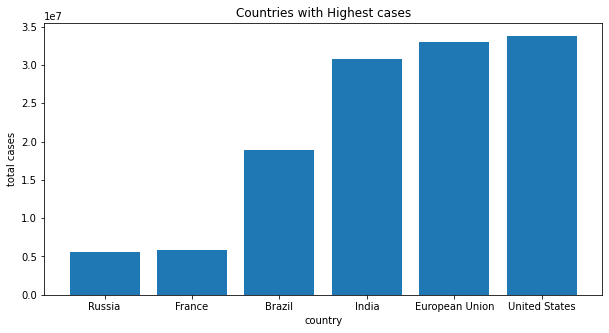

In [181]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(Highest_Number_of_Total_cases["location"], Highest_Number_of_Total_cases["total_cases"])
plt.plot()
plt.xlabel("country")
plt.ylabel("total cases")
plt.title("Countries with Highest cases")
plt.show()

In [157]:
Least_Number_of_Total_cases = total_cases.head(5)
Least_Number_of_Total_cases

,location,total_cases
59572,Micronesia (country),1.0
48708,Kiribati,2.0
77820,Samoa,3.0
57888,Marshall Islands,4.0
97579,Vanuatu,4.0


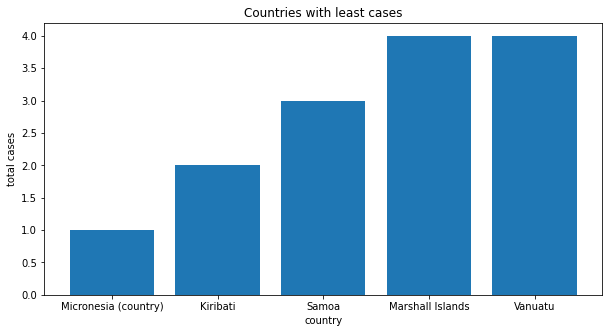

In [180]:
plt.figure(figsize=(10,5))
plt.bar(Least_Number_of_Total_cases["location"], Least_Number_of_Total_cases["total_cases"])
plt.plot()
plt.xlabel("country")
plt.ylabel("total cases")
plt.title("Countries with least cases")
plt.show()

# Information on Total deaths

In [159]:
Highest_Number_of_Total_deaths = total_deaths.tail(6)
Highest_Number_of_Total_deaths

,location,total_deaths
72531,Peru,193909.0
59403,Mexico,234458.0
42344,India,405939.0
13356,Brazil,530179.0
96374,United States,606475.0
31470,European Union,741165.0


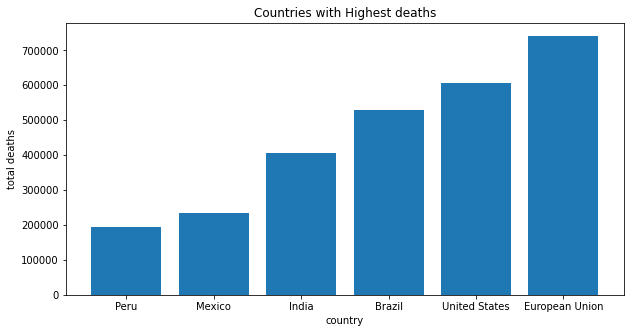

In [177]:
plt.figure(figsize=(10,5))
plt.bar(Highest_Number_of_Total_deaths["location"], Highest_Number_of_Total_deaths["total_deaths"])
plt.plot()
plt.xlabel("country")
plt.ylabel("total deaths")
plt.title("Countries with Highest deaths")
plt.show()

In [161]:
Least_Number_of_Total_deaths = total_deaths.head(5)
Least_Number_of_Total_deaths

,location,total_deaths
37222,Grenada,1.0
11414,Bhutan,1.0
97579,Vanuatu,1.0
50641,Laos,3.0
13886,Brunei,3.0


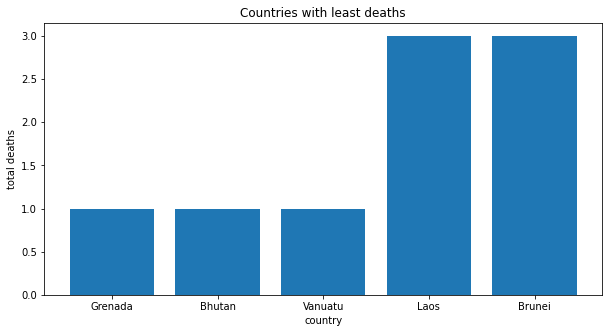

In [178]:
plt.figure(figsize=(10,5))
plt.bar(Least_Number_of_Total_deaths["location"], Least_Number_of_Total_deaths["total_deaths"])
plt.plot()
plt.xlabel("country")
plt.ylabel("total deaths")
plt.title("Countries with least deaths")
plt.show()

# Information on Total Tests

In [163]:
 Highest_Number_of_Total_tests = total_tests.tail(5)
Highest_Number_of_Total_tests

,location,total_tests
33283,France,92391415.0
75578,Russia,154194977.0
95840,United Kingdom,218648631.0
42344,India,425843467.0
96374,United States,472430618.0


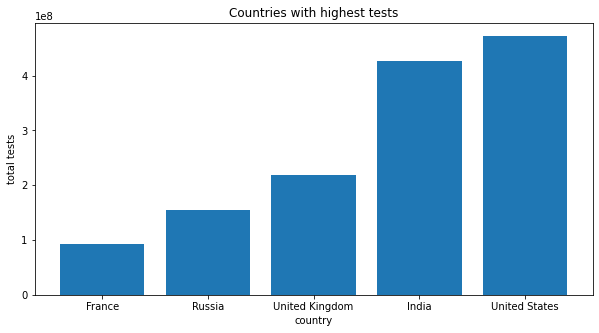

In [179]:
plt.figure(figsize=(10,5))
plt.bar(Highest_Number_of_Total_tests["location"], Highest_Number_of_Total_tests["total_tests"])
plt.plot()
plt.xlabel("country")
plt.ylabel("total tests")
plt.title("Countries with highest tests")
plt.show()

In [165]:
Least_Number_of_Total_tests = total_tests.head(5)
Least_Number_of_Total_tests

,location,total_tests
76623,Saint Kitts and Nevis,22206.0
28442,Equatorial Guinea,161837.0
55625,Malawi,277185.0
92073,Togo,372431.0
49190,Kosovo,685799.0


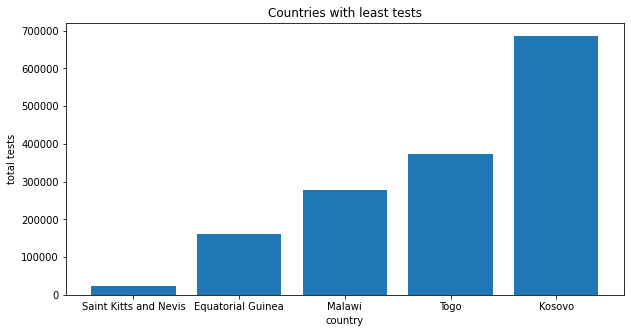

In [176]:
plt.figure(figsize=(10,5))
plt.bar(Least_Number_of_Total_tests["location"], Least_Number_of_Total_tests["total_tests"])
plt.plot()
plt.xlabel("country")
plt.ylabel("total tests")
plt.title("Countries with least tests")
plt.show()

# Information on People Vaccinated

In [167]:
 Highest_Number_of_people_vaccinated = people_vaccinated.tail(5)
Highest_Number_of_people_vaccinated

,location,people_vaccinated
93595,Turkey,37318116.0
13356,Brazil,81987988.0
96374,United States,183237046.0
31470,European Union,236710633.0
42344,India,293508847.0


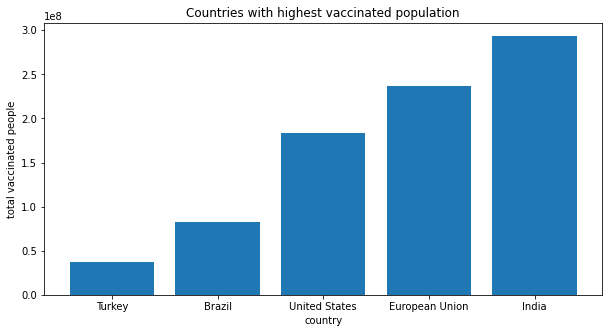

In [175]:
plt.figure(figsize=(10,5))
plt.bar(Highest_Number_of_people_vaccinated["location"], Highest_Number_of_people_vaccinated["people_vaccinated"])
plt.plot()
plt.xlabel("country")
plt.ylabel("total vaccinated people")
plt.title("Countries with highest vaccinated population")
plt.show()

In [169]:
Least_Number_of_people_vaccinated = people_vaccinated.head(5)
Least_Number_of_people_vaccinated

,location,people_vaccinated
76623,Saint Kitts and Nevis,22972.0
77105,Saint Lucia,31127.0
36748,Greenland,31311.0
31631,Faeroe Islands,31781.0
17545,Cayman Islands,48764.0


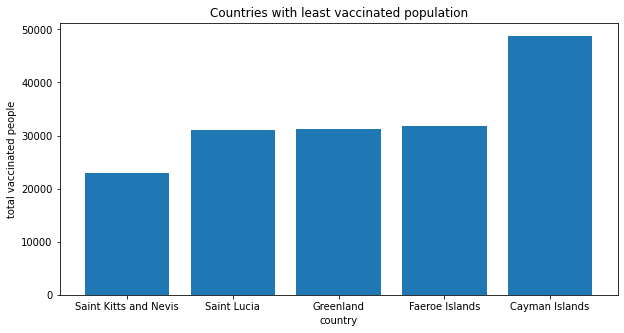

In [174]:
plt.figure(figsize=(10,5))
plt.bar(Least_Number_of_people_vaccinated["location"], Least_Number_of_people_vaccinated["people_vaccinated"])
plt.plot()
plt.xlabel("country")
plt.ylabel("total vaccinated people")
plt.title("Countries with least vaccinated population")
plt.show()